**Euler explicite**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve

In [12]:
def f(t,x) : return -x

def eulerExplicite(f,y0,T,N):
    delta=T/N
    res = np.zeros(N)
    res[0]=y0
    for n in range(N-1):
        res[n+1] = res[n] + delta * f((delta*n),res[n])
    Vx=np.linspace(0,T, N)
    return res,Vx


sol,Vx = eulerExplicite(f, 1,10,50)


def solutionExacte(t): return np.exp(-t)

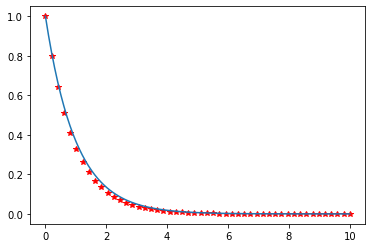

In [13]:
plt.plot(Vx, sol, "*r")
Vx1=np.linspace(0,10,100)
plt.plot(Vx1, solutionExacte(Vx1))

**Eurler implicite**